<h1 style="text-align: center;"> Emissions by Country, 2002-2022 </h1>


## Table of Contents

* [Introduction](#Introduction)

    * [Columns](#Columns)
    
    
* [Preparation](#Preparation)

    * [Importing packages](#packages)
    * [Importing dataset](#dataset)
    * [Exploring dataset](#Exploring)
    * [Cleaning dataset](#Cleaning)
    
    
* [Chapter 3](#chapter3)


## Introduction <a class="anchor" id="Introduction"></a>

This dataset provides information on total CO2 emissions for each country for the years 2002-2022  as well as from coal, oil, gas, cement production and flaring, and other sources.

<a href="https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022" > Kaggle</a>

### Columns <a class="anchor" id="Columns"></a>
The information is divided into the following columns:

`Country` - The name of the country. 

`ISO 3166-1 alpha-3` - The three-letter code for the country.

`Year` - The year of the data.

`Total` - The total amount of CO2 emissions for the country in the given year. 

`Coal` - The amount of CO2 emissions from coal for the country in the given year.

`Oil` - The amount of CO2 emissions from oil for the country in the given year.

`Gas` - The amount of CO2 emissions from gas for the country in the given year.

`Cement` - The amount of CO2 emissions from cement production for the country in the given year. 

`Flaring` - The amount of CO2 emissions from flaring operations for the country in the given year. 

`Other` - The amount of CO2 emissions from other sources for the country in the given year.

`Per Capita` - The amount of CO2 emissions per capita for the country in the given year.


## Preparation <a class="anchor" id="Preparation"></a>


### Importing packages <a class="anchor" id="packages"></a>



Package required for this analysis

In [20]:
#https://pypi.org/project/pycountry-convert/
!pip install pycountry_convert

Defaulting to user installation because normal site-packages is not writeable


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive
import pycountry_convert as pc

### Importing dataset <a class="anchor" id="dataset"></a>

In [3]:
dataset = pd.read_csv("Data/GCB2022v27_MtCO2_flat.csv")

### Exploring dataset <a class="anchor" id="Exploring"></a>

In [4]:
display(dataset)
print("Diferent: {}".format(len(list(dataset['Country'].unique()))))

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


Diferent: 232


In [5]:
print(*list(dataset['Country'].unique()), sep = ' - ')  

Afghanistan - Albania - Algeria - Andorra - Angola - Anguilla - Antarctica - Antigua and Barbuda - Argentina - Armenia - Aruba - Australia - Austria - Azerbaijan - Bahamas - Bahrain - Bangladesh - Barbados - Belarus - Belgium - Belize - Benin - Bermuda - Bhutan - Bonaire, Saint Eustatius and Saba - Bosnia and Herzegovina - Botswana - Brazil - British Virgin Islands - Brunei Darussalam - Bulgaria - Burkina Faso - Burundi - Cambodia - Canada - Cape Verde - Central African Republic - Chad - Chile - China - Christmas Island - Colombia - Comoros - Congo - Cook Islands - Costa Rica - Côte d'Ivoire - Croatia - Cuba - Curaçao - Cyprus - Czech Republic - North Korea - Democratic Republic of the Congo - Denmark - Djibouti - Dominica - Dominican Republic - Ecuador - Egypt - El Salvador - Equatorial Guinea - Eritrea - Estonia - Ethiopia - Faeroe Islands - Micronesia (Federated States of) - Fiji - Finland - Panama Canal Zone - France - French Equatorial Africa - French Guiana - French Polynesia - F

There are 63104 rows in total from 230 countries, global and international transport.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


With this information we realize that there are countries that have Nan in the **ISO 3166-1 alpha-3** row (three-letter code), so these countries will be eliminated for this analysis.

In [7]:
print('That countries correspond to {} rows in the dataset.'.format(len(dataset[dataset['ISO 3166-1 alpha-3'].isna()])))
print('The countries are: ')
for i in dataset[dataset['ISO 3166-1 alpha-3'].isna()]['Country'].unique():
    print("- "+ i)

That countries correspond to 1632 rows in the dataset.
The countries are: 
- French Equatorial Africa
- French West Africa
- Kuwaiti Oil Fires
- Leeward Islands
- Pacific Islands (Palau)
- Ryukyu Islands


In addition, we can see that the columns **Total**, **Coal**, **Oil**, **Gas**, **Cement**, **Burn**, **Other** and **Per capita** also have Nan values, but because of the context of the data, such as the year in which the data starts, it can be assumed that they correspond to 0 CO2 emissions in each column.

### Cleaning dataset <a class="anchor" id="Cleaning"></a>

Removing countries that do not have ISO 3166-1 alpha-3 from the dataset and filling the values Nan from the other columns with 0.

In [8]:
dataset = dataset[dataset['ISO 3166-1 alpha-3'].notna()]

In [9]:
dataset.fillna(0,inplace=True)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61472 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             61472 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                61472 non-null  int64  
 3   Total               61472 non-null  float64
 4   Coal                61472 non-null  float64
 5   Oil                 61472 non-null  float64
 6   Gas                 61472 non-null  float64
 7   Cement              61472 non-null  float64
 8   Flaring             61472 non-null  float64
 9   Other               61472 non-null  float64
 10  Per Capita          61472 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.6+ MB


In [11]:
display(dataset)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,1751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Afghanistan,AFG,1752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Afghanistan,AFG,1753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Afghanistan,AFG,1754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


Now there are no Nan values in the dataset.

Next I am gonna separate the data from Global and International Transport, for a beter compare for each country with the others. 

In [12]:
Global = dataset[dataset['Country'] == 'Global']
International_Transport = dataset[dataset['Country'] == 'International Transport']

In [13]:
dataset = dataset[dataset['Country'] != 'Global']
dataset = dataset[dataset['Country'] != 'International Transport']

In [14]:
display(dataset)
print("Diferent: {}".format(len(list(dataset['Country'].unique()))))

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,Afghanistan,AFG,1751,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,Afghanistan,AFG,1752,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,Afghanistan,AFG,1753,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
4,Afghanistan,AFG,1754,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
62555,Zimbabwe,ZWE,2017,9.596071,5.900452,3.226752,0.0,0.468867,0.0,0.0,0.650533
62556,Zimbabwe,ZWE,2018,11.795478,7.177776,4.059712,0.0,0.557990,0.0,0.0,0.783639
62557,Zimbabwe,ZWE,2019,11.114607,6.888320,3.656672,0.0,0.569615,0.0,0.0,0.723861
62558,Zimbabwe,ZWE,2020,10.607897,6.721571,3.316712,0.0,0.569615,0.0,0.0,0.676970


Diferent: 224


Now I have 60928 rows of 224 countries.

## Analysis

In [15]:
countries = list(dataset['Country'].unique())
CO2_columns = list(dataset.columns.values[3:])

In [49]:
CO2_2021 = dataset[dataset['Year'] == 2021]
CO2_2021 = CO2_2021["Total"]
Top10_2021 = [i for _,i in sorted(zip(CO2_2021,countries), reverse=True)][:10]
print(Top15_2021)

['China', 'USA', 'India', 'Russia', 'Japan', 'Iran', 'Germany', 'Saudi Arabia', 'Indonesia', 'South Korea', 'Canada', 'Brazil', 'Turkey', 'South Africa', 'Mexico']


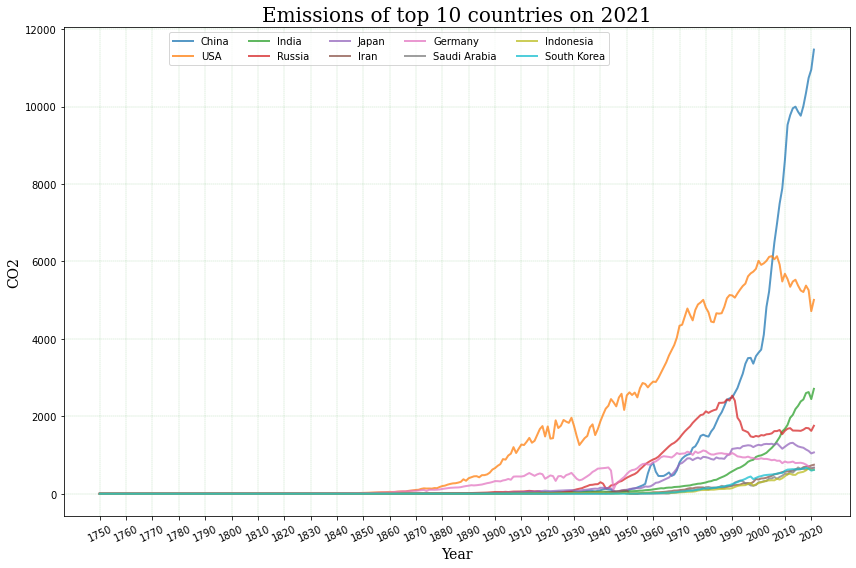

In [131]:
fig, ax = plt.subplots(figsize=(12, 8), tight_layout=True, facecolor='w')
for i in Top10_2021:
    ax.plot(dataset[dataset['Country'] == i]['Year'], dataset[dataset['Country'] == i]['Total'],
            alpha=0.75, label=i, linewidth=2)
ax.set_title('Emissions of top 10 countries on 2021', fontsize=20, fontname='serif')
ax.set_ylabel('CO2', fontsize=14, fontname='serif')
ax.set_xlabel('Year', fontsize=14, fontname='serif')
ax.set_xticks(range(1750, 2022,10))
plt.xticks(rotation=25)
ax.grid(color="g", which="major", axis='both', linestyle=':', linewidth=0.25)
ax.legend(loc=1, ncol=5, bbox_to_anchor=(0.7, 1));
plt.show()

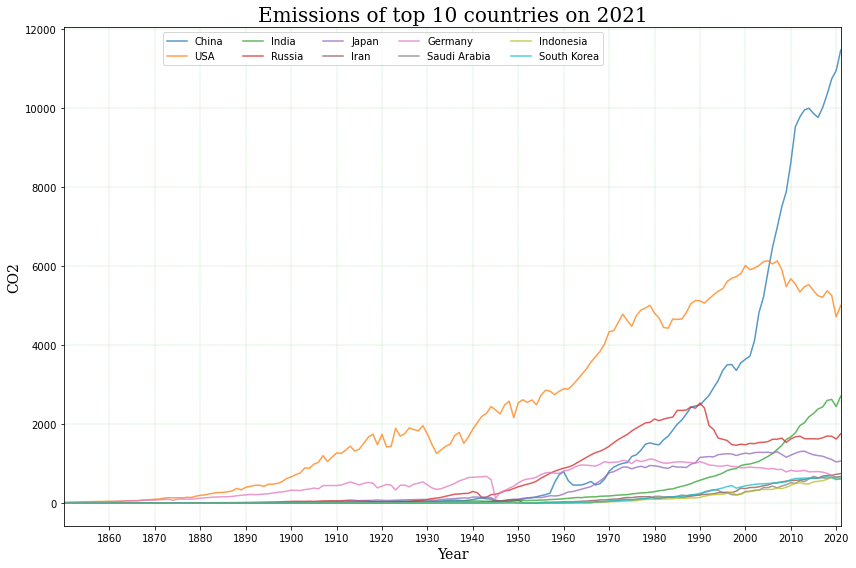

In [137]:
fig, ax = plt.subplots(figsize=(12, 8), tight_layout=True, facecolor='w')
for i in Top10_2021:
    ax.plot(dataset[dataset['Country'] == i]['Year'], dataset[dataset['Country'] == i]['Total'], alpha=0.75, label=i)
ax.set_title('Emissions of top 10 countries on 2021', fontsize=20, fontname='serif')
ax.set_ylabel('CO2', fontsize=14, fontname='serif')
ax.set_xlabel('Year', fontsize=14, fontname='serif')
ax.set_xlim(1850, 2021)
ax.set_xticks(range(1860, 2022,10))
ax.grid(color="g", which="major", axis='both', linestyle=':', linewidth=0.25)
ax.legend(loc=1, ncol=5, bbox_to_anchor=(0.7, 1));
plt.show()

In [138]:
Top10_2021_total = dataset[dataset['Country'].isin(Top10_2021)].groupby('Year').sum()

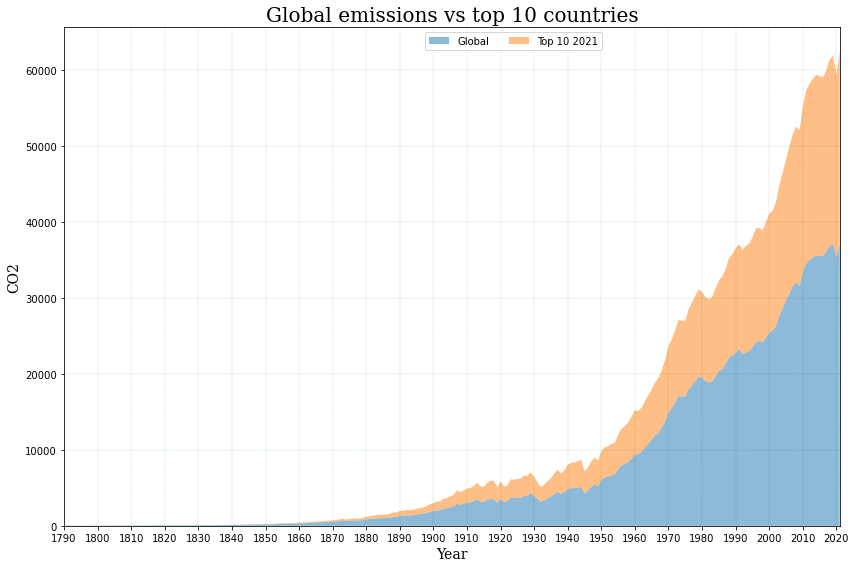

In [139]:
fig, ax = plt.subplots(figsize=(12, 8), tight_layout=True, facecolor='w')

ax.stackplot(Global['Year'], Global["Total"], Top10_2021_total["Total"], alpha=0.5, labels=('Global', 'Top 10 2021'));
ax.set_title('Global emissions vs top 10 countries', fontsize=20, fontname='serif')
ax.set_ylabel('CO2', fontsize=14, fontname='serif')
ax.set_xlabel('Year', fontsize=14, fontname='serif')
ax.set_xlim(1790, 2021)
ax.set_xticks(range(1790, 2022,10))
ax.grid(color="g", which="major", axis='both', linestyle=':', linewidth=0.25)
ax.legend(loc=1, ncol=5, bbox_to_anchor=(0.7, 1));
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


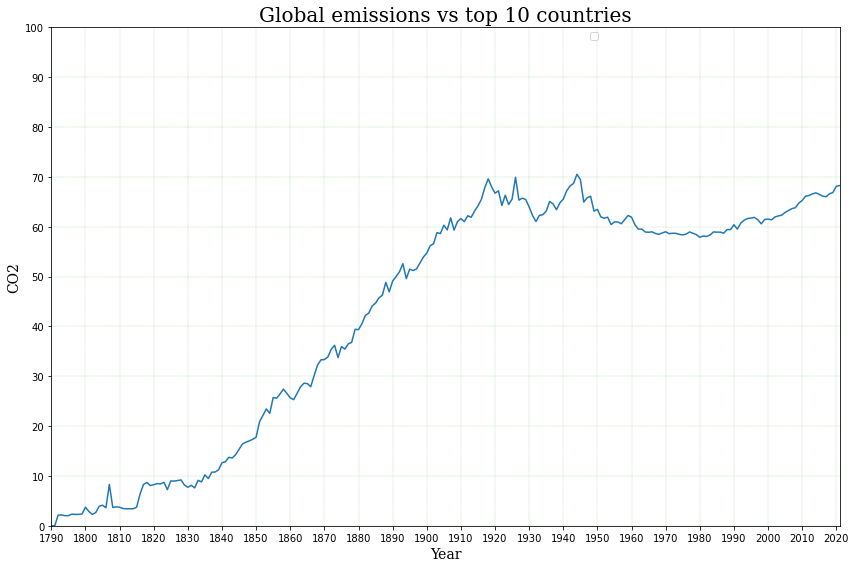

In [179]:
fig, ax = plt.subplots(figsize=(12, 8), tight_layout=True, facecolor='w')

percentage = (Top10_2021_total["Total"].values / Global["Total"].values * 100)[:100]

ax.plot(Global['Year'], (Top10_2021_total["Total"].values / Global["Total"].values * 100))

ax.set_title('Global emissions vs top 10 countries', fontsize=20, fontname='serif')
ax.set_ylabel('CO2', fontsize=14, fontname='serif')
ax.set_xlabel('Year', fontsize=14, fontname='serif')
ax.set_xlim(1790, 2021)
ax.set_ylim(0, 100)
ax.set_yticks(range(0,101,10))
ax.set_xticks(range(1790, 2022,10))
ax.grid(color="g", which="major", axis='both', linestyle=':', linewidth=0.25)
ax.legend(loc=1, ncol=5, bbox_to_anchor=(0.7, 1));

plt.show()

Analisis por continente

In [184]:
continent = [12, 8]
for i in list(dataset["ISO 3166-1 alpha-3"].values):
    if i == "KSV":
        continent.append("EU")
    elif i == "PCZ" or pc.country_alpha3_to_country_alpha2(i) == "SX":
        continent.append("NA")
    elif pc.country_alpha3_to_country_alpha2(i) == "AQ":
        continent.append("AN")
    elif pc.country_alpha3_to_country_alpha2(i) == "TL":
        continent.append("AS")
    else:
        continent.append(pc.country_alpha2_to_continent_code(pc.country_alpha3_to_country_alpha2(i)))

In [187]:
dataset["Continent"] = continent

In [208]:
list(dataset['Continent'].unique())

['AS', 'EU', 'AF', 'NA', 'AN', 'SA', 'OC']

In [ ]:
As = 
Eu
Af
Na
An
Sa
Oc

Text(0, 0.5, 'Infectados totales a la fecha')

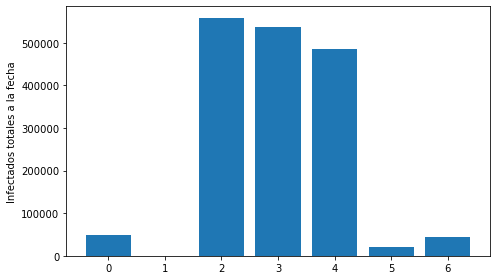

In [194]:
dataset.groupby('Continent').sum()["Total"]

Continent
AF     49133.684496
AN         0.153888
AS    557420.089977
EU    536942.728554
NA    484230.081476
OC     21357.226841
SA     44267.540358
Name: Total, dtype: float64

In [188]:
dataset[dataset['Country'].isin(Top10_2021)].groupby('Year').sum()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Continent
0,Afghanistan,AFG,1750,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,AS
1,Afghanistan,AFG,1751,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,AS
2,Afghanistan,AFG,1752,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,AS
3,Afghanistan,AFG,1753,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,AS
4,Afghanistan,AFG,1754,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,AS
...,...,...,...,...,...,...,...,...,...,...,...,...
62555,Zimbabwe,ZWE,2017,9.596071,5.900452,3.226752,0.0,0.468867,0.0,0.0,0.650533,AF
62556,Zimbabwe,ZWE,2018,11.795478,7.177776,4.059712,0.0,0.557990,0.0,0.0,0.783639,AF
62557,Zimbabwe,ZWE,2019,11.114607,6.888320,3.656672,0.0,0.569615,0.0,0.0,0.723861,AF
62558,Zimbabwe,ZWE,2020,10.607897,6.721571,3.316712,0.0,0.569615,0.0,0.0,0.676970,AF


In [52]:
country = widgets.Dropdown(description="Country", options=countries)

def Graph(country):
    fig, ax = plt.subplots(figsize=(12, 8), tight_layout=True, facecolor='w')
    x = dataset[dataset['Country'] == country]['Year']
    for i in CO2_columns:
        ax.plot(x, dataset[dataset['Country'] == country][i], linewidth = 2, alpha=0.5, label=i)
        
    ax.set_title('Emission of ' + country, fontsize=20, fontname='serif')
    ax.set_ylabel('CO2', fontsize=14, fontname='serif')
    ax.set_xlabel('Year', fontsize=14, fontname='serif')
    ax.grid(color="g", which="major", axis='both', linestyle=':', linewidth=0.25)
    ax.legend(loc=1, ncol=4, bbox_to_anchor=(0.5, 1), fontsize=12);
    plt.show()    


out1 = widgets.interactive(Graph, country=country)

display(out1)

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

In [19]:
!jupyter nbconvert --to html emissions-by-country.ipynb

[NbConvertApp] Converting notebook emissions-by-country.ipynb to html
[NbConvertApp] Writing 750809 bytes to emissions-by-country.html
